In [1]:
import cv2
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

In [2]:

def read_geotiff(file_path,band_num=1):
    dataset = gdal.Open(file_path)
    image = np.stack([dataset.GetRasterBand(i).ReadAsArray() for i in range(1, dataset.RasterCount + 1)], axis=-1)
    return image

In [3]:
def kmeans_clustering(image, num_clusters):
    # Reshape the image to a 2D array of pixels
    pixels = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.float32)
    pixels = pixels.reshape((-1, 1))

    # Define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert the centers back to 8-bit values
    centers = np.uint8(centers)

    # Map the labels to the centers
    segmented_image = centers[labels.flatten()]

    # Reshape back to the original image shape
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

In [4]:
def visualize_images(original, segmented):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap='viridis')  # Adjust the colormap as needed
    plt.title('Segmented Image')
    plt.axis('off')

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


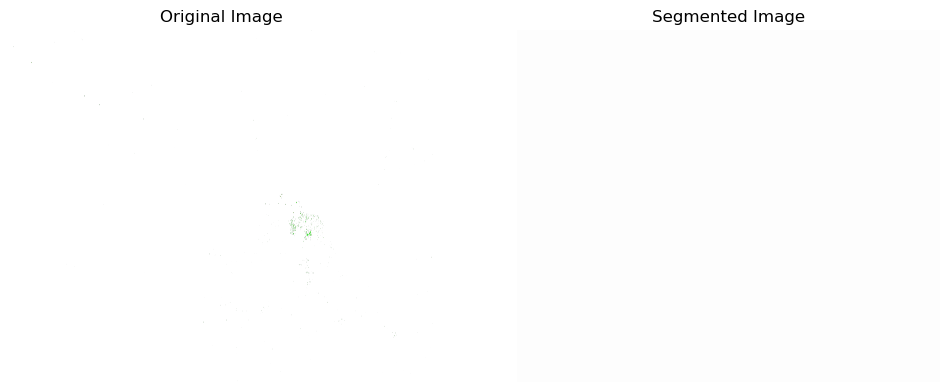

In [5]:
geotiff_path = './subset_0_of_S1A_IW_GRDH_1SDV_20240113T092308_20240113T092333_052086_064B95_F370_Cal_Spk_TC.tif'

    # Number of clusters for k-means (you may need to adjust this based on your image)
num_clusters = 2

# Read the GeoTIFF image
original_image = read_geotiff(geotiff_path)

# Perform k-means clustering
segmented_image = kmeans_clustering(original_image, num_clusters)

# Visualize the results
visualize_images(original_image, segmented_image)